In [1]:
import csv
import random
from itertools import product
import math 

# Define lists for velocities and initial placements
camera_velocities = [
    # 0.0,
    # 30.0, 
    50.0, 
    # 60.0, 
    # 80.0
]
object_velocities = [
    # 30.0, 
    50.0, 
    # 60.0, 
    # 80.0
]

# Define ball directions (left-to-right and right-to-left)
object_directions = {
    "horizontal_left": (-1, 0),
    "horizontal_right": (1, 0),
    "down": (0, -1),
    "up": (0, 1)
}

# Define possible camera directions
camera_directions = {
    "horizontal_left": (-1, 0),
    "horizontal_right": (1, 0),
    "up": (0, 1),
    "down": (0, -1),
    "zero": (0, 0)
}

# Define initial placements corresponding to object velocities and directions
initial_ball_placements = {
    "horizontal_left": {
        30.0: (0.5, 0.5),
        50.0: (0.5, 0.5),
        60.0: (0.5, 0.5),
        80.0: (0.5, 0.5),
    },
    "horizontal_right": {
        30.0: (0.5, 0.5),
        50.0: (0.5, 0.5),
        60.0: (0.5, 0.5),
        80.0: (0.5, 0.5),
    },
    "down": {
        30.0: (0.5, 0.5),
        50.0: (0.5, 0.5),
        60.0: (0.5, 0.5),
        80.0: (0.5, 0.5),
    },
    "up": {
        30.0: (0.5, 0.5),
        50.0: (0.5, 0.5),
        60.0: (0.5, 0.5),
        80.0: (0.5, 0.5),
    }
}

# Crosshair placements for left-to-right and right-to-left object directions
initial_crosshair_placements = {
    "horizontal_left": {
        30.0: (0.5, 0.5),
        50.0: (0.5, 0.5),
        60.0: (0.5, 0.5),
        80.0: (0.5, 0.5),
    },
    "horizontal_right": {
        30.0: (0.5, 0.5),
        50.0: (0.5, 0.5),
        60.0: (0.5, 0.5),
        80.0: (0.5, 0.5),
    },
    "down": {
        30.0: (0.5, 0.5),
        50.0: (0.5, 0.5),
        60.0: (0.5, 0.5),
        80.0: (0.5, 0.5),
    },
    "up": {
        30.0: (0.5, 0.5),
        50.0: (0.5, 0.5),
        60.0: (0.5, 0.5),
        80.0: (0.5, 0.5),
    }
}

# Define duration mapping based on object velocity
duration_mapping = {
    "horizontal_left": {
        30.0: 1,
        50.0: 1,
        60.0: 1,
        80.0: 1
    },
    "horizontal_right": {
        30.0: 1,
        50.0: 1,
        60.0: 1,
        80.0: 1
    },
    "down": {
        30.0: 1,
        50.0: 1,
        60.0: 1,
        80.0: 1
    },
    "up": {
        30.0: 1,
        50.0: 1,
        60.0: 1,
        80.0: 1 
    }
    
}

# Define other trial parameters
ramp_location = (-1, 0)

# Helper function to format Vector2 tuples without commas
def format_vector(vector):
    return f"({vector[0]} {vector[1]})"

# Generate unique trials
unique_trials = []
trial_id = 0

for obj_velocity, (obj_motion_type, obj_direction), (cam_motion_type, cam_direction) in product(
        object_velocities,
        object_directions.items(),
        camera_directions.items()):
    
    # Only include one trial per object speed if the camera direction is zero
    if cam_direction == (0, 0):
        cam_velocities_to_use = [0]  # Only one trial for the zero camera direction
    else:
        cam_velocities_to_use = camera_velocities
    
    for cam_velocity in cam_velocities_to_use:
        if cam_direction[0] != 0 and cam_direction[1] != 0:
            cam_velocity_final = math.sqrt(2*cam_velocity**2)
        else:
            cam_velocity_final = cam_velocity
        
        # Map initial placements based on object velocity and direction
        initial_ball_placement = initial_ball_placements[obj_motion_type][obj_velocity]
        initial_crosshair_placement = initial_crosshair_placements[obj_motion_type][obj_velocity]
        
        # Retrieve duration based on object velocity
        duration = duration_mapping[obj_motion_type][obj_velocity]
        
        trial = {
            "trial_id": trial_id,
            "object_motion_type": obj_motion_type,
            "object_direction": format_vector(obj_direction),
            "object_speed": obj_velocity,
            "camera_motion_type": cam_motion_type,
            "camera_direction": format_vector(cam_direction),
            "camera_speed": cam_velocity,
            "ramp_location": format_vector(ramp_location),
            "duration": duration,
            "initial_ball_placement": format_vector(initial_ball_placement),
            "initial_crosshair_placement": format_vector(initial_crosshair_placement)
        }
        unique_trials.append(trial)
        trial_id += 1

# Write trials to CSV
csv_file = "generated_trial_ids/generated_trials_ids_no_prediction_50.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=unique_trials[0].keys())
    writer.writeheader()
    writer.writerows(unique_trials)

print(f"Shuffled trials saved to {csv_file}")
print(len(unique_trials))


Shuffled trials saved to generated_trial_ids/generated_trials_ids_no_prediction_50.csv
20


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data structure to organize pair conditions
cam_velocities_per_motion_condition_given_obj_vel  = {
    "with_faster": {
        15.0: 30.0,
        30.0: 60.0,
        60.0: 120.0,
    },
    "with_same": {
        15.0: 15.0,
        30.0: 30.0,
        60.0: 60.0,
    },
    "with_half": {
        15.0: 7.5,
        30.0: 15.0,
        60.0: 30.0,
    },
    "zero": {
        15.0: 0,
        30.0: 0,
        60.0: 0,
    },
    "against_half": {
        15.0: -7.5,
        30.0: -15.0,
        60.0: -30.0,
    }
}


In [4]:
def generate_shuffled_trials(input_file_path, output_file_path, repetition_amount):
    # Read the CSV data from the input file
    with open(input_file_path, mode='r') as file:
        reader = csv.DictReader(file)
        unique_trials = list(reader)

    # Repeat each trial specified number of times
    all_trials = unique_trials * repetition_amount

    # Shuffle all trials
    random.shuffle(all_trials)

    # Write the shuffled trials to the output CSV file
    with open(output_file_path, mode="w", newline="") as file:
        writer = csv.DictWriter(file, fieldnames=all_trials[0].keys())
        writer.writeheader()
        writer.writerows(all_trials)

    print(f"Shuffled trials saved to {output_file_path}")
    print(f"Total trials: {len(all_trials)}")
    
csv_file = "generated_trial_ids/generated_trials_ids_no_prediction_50.csv"

# Example usage
input_csv_path = csv_file  # Replace with your input file path
output_csv_path = "generated_shuffled_trials/generated_shuffled_trials_no_prediction_50.csv"  # Replace with your desired output file path
repetition_amount = 30  # Specify how many times each trial should be repeated

generate_shuffled_trials(input_csv_path, output_csv_path, repetition_amount)

Shuffled trials saved to generated_shuffled_trials/generated_shuffled_trials_no_prediction_50.csv
Total trials: 120


(1.0, 0.0)
(1.0, 0.5773502691896257)
(1.0, 1.7320508075688767)


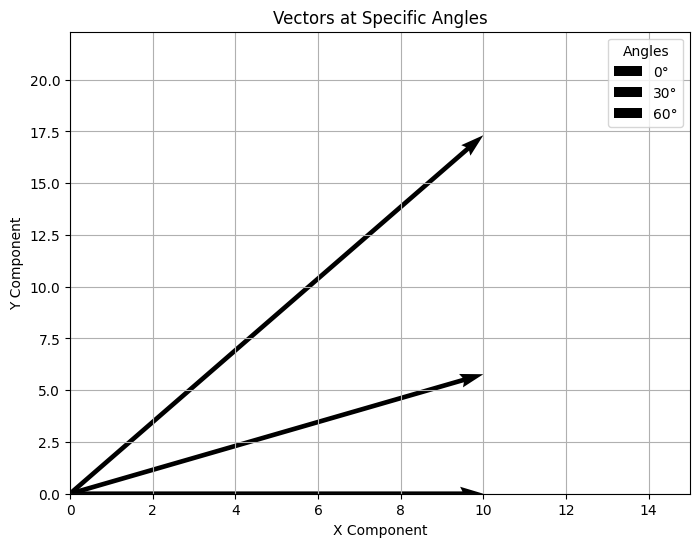

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def generate_vectors_for_angles(fixed_x_magnitude, angles_deg, scale_factor):
    """
    Generate 2D vectors for specified angles with a fixed X component and scaled Y component.
    
    Args:
        fixed_x_magnitude (float): Fixed X magnitude for the vectors.
        angles_deg (list or np.array): Specific angles from the horizontal in degrees.
        scale_factor (float): Scaling factor for the Y component magnitude.
    
    Returns:
        list: A list of 2D vectors [(Vx, Vy), ...].
    """
    vectors = []
    for angle_deg in angles_deg:
        angle_rad = np.radians(angle_deg)  # Convert angle to radians
        Vx = fixed_x_magnitude  # Keep X component fixed
        Vy = Vx * np.tan(angle_rad)  # Scale Y component while keeping the angle
        vectors.append((Vx, Vy))
    return vectors

# Example Parameters
fixed_x_magnitude = 10  # Fixed magnitude for the X component
angles_deg = [0, 30, 60]  # Specific angles in degrees
scale_factor = 10  # Scale Y component to twice its original magnitude

# Generate Vectors
vectors = generate_vectors_for_angles(fixed_x_magnitude, angles_deg, scale_factor)

# Plot the Vectors
plt.figure(figsize=(8, 6))
origin = np.array([0, 0])  # Origin point for the vectors
for angle, (Vx, Vy) in zip(angles_deg, vectors):
    plt.quiver(*origin, Vx, Vy, angles='xy', scale_units='xy', scale=1, label=f"{angle}°")
for angle, (Vx, Vy) in zip(angles_deg, vectors):
    print(f"({Vx/10}, {Vy/10})")
    
# Set plot limits
plt.xlim(0, fixed_x_magnitude + 5)
plt.ylim(0, max(v[1] for v in vectors) + 5)

# Add labels, legend, and grid
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('X Component')
plt.ylabel('Y Component')
plt.title('Vectors at Specific Angles')
plt.grid()
plt.legend(title="Angles")

# Show the plot
plt.show()


In [ ]:
pair_conditions = {
    "diagonal_with": {
        "horizontal_left": ["diagonal_left_up", "diagonal_left_down"],
        "horizontal_right": ["diagonal_right_up", "diagonal_right_down"]
    },
    "diagonal_against": {
        "horizontal_left": ["diagonal_right_up", "diagonal_right_down"],
        "horizontal_right": ["diagonal_left_up", "diagonal_left_down"]
    },
    "vertical": {
        "horizontal_left": ["vertical_up", "vertical_down"],
        "horizontal_right": ["vertical_up", "vertical_down"]
    },
    "horizontal_with": {
        "horizontal_left": ["horizontal_left"],
        "horizontal_right": ["horizontal_right"]
    },
    "horizontal_against": {
        "horizontal_left": ["horizontal_right"],
        "horizontal_right": ["horizontal_left"]
    },
    "zero": {
        "horizontal_left": ["zero"],
        "horizontal_right": ["zero"]
    }
}


In [22]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("generated_trials_ids_pilot.csv")

# Function to find trial IDs that match specified column values and display values for missing columns
def get_matching_trial_ids_and_missing_columns(df, column_values):
    # Create query string only for the provided columns
    query_str = ' & '.join([f"{col} == {repr(val)}" for col, val in column_values.items()])
    
    # Query the DataFrame based on provided column values
    matching_trials = df.query(query_str)
    
    # Find missing columns that were not provided in the column_values dictionary
    missing_columns = [col for col in ['camera_motion_type', 'object_motion_type', 'camera_speed', 'object_speed'] if col not in column_values]
    
    # For each matching trial, print the trial_id and the values of the missing columns
    for _, row in matching_trials.iterrows():
        trial_id = row['trial_id']
        missing_values = {col: row[col] for col in missing_columns}
        print(f"Trial ID: {trial_id}, Missing Column Values: {missing_values}")
    
    # Return the list of matching trial IDs
    return matching_trials['trial_id'].tolist()

camera_speeds_print = [15.0]
matching_trial_ids_list = []
for cam_speed in camera_speeds_print:
    # Define the specific values to match in each column (omit any of the 4 columns as needed)
    column_values = {
        'camera_motion_type': 'diagonal_left_down',
        'object_motion_type': 'left_to_right',
        'object_speed': cam_speed
        # 'object_motion_type' and 'object_speed' are omitted
    }

    # Get the list of trial IDs that match the specified values and print missing columns
    matching_trial_ids = get_matching_trial_ids_and_missing_columns(df, column_values)
    matching_trial_ids_list += matching_trial_ids
    # Output the matching trial IDs
print("Matching trial IDs:", matching_trial_ids_list)


Trial ID: 0, Missing Column Values: {'camera_speed': 21.213203435596427}
Trial ID: 1, Missing Column Values: {'camera_speed': 113.1370849898476}
Matching trial IDs: [0, 1]


In [ ]:
import csv
import random
from itertools import product
import math 

# Define lists for velocities and initial placements
camera_velocities = [
    # 15.0, 
    # 20.0,
    # 30.0, 
    # 40.0,
    # 60.0, 
    70.0,
    # 80.0
    ]
object_velocities = [
    # 15.0, 
    # 20.0,
    # 30.0, 
    # 40.0,
    # 60.0, 
    70.0,
    # 80.0
    ]

# Define ball directions (left-to-right and right-to-left)
object_directions = {
    "left_to_right": (-1, 0),
    # "right_to_left": (1, 0),
    # "down": (0, -1)
}

# Define possible camera directions
camera_directions = {
    # "diagonal_left_up": (-1, 1),
    # "diagonal_left_down": (-1, -1),
    # "diagonal_right_down": (1, -1),
    # "diagonal_right_up": (1, 1),

    # # y-1 30 deg
    # "diagonal_left_up_y1": (-1, 0.5773502691896257),
    # "diagonal_left_down_y1": (-1, -0.5773502691896257),
    # "diagonal_right_down_y1": (1, -0.5773502691896257),
    # "diagonal_right_up_y1": (1,0.5773502691896257),

    # # y-2 60 deg
    # "diagonal_left_up_y2": (-1, 1.7320508075688767),
    # "diagonal_left_down_y2": (-1, -1.7320508075688767),
    # "diagonal_right_down_y2": (1, -1.7320508075688767),
    # "diagonal_right_up_y2": (1, 1.7320508075688767),

    "horizontal_left": (-1, 0),
    "horizontal_right": (1, 0),

    # "vertical_up": (0, 1),
    # "vertical_down": (0, -1), 
    "zero": (0, 0)
}

# Define initial placements corresponding to object velocities and directions
initial_ball_placements = {
    "left_to_right": {
        70.0: (0.98, 0.5),
    },
    "right_to_left": {
        70.0: (0.02, 0.5),
    },
    "down": {
        70.0: (0.5, 0.98),  
    }
}

# Crosshair placements for left-to-right and right-to-left object directions
initial_crosshair_placements = {
    "left_to_right": {
        70.0: (0.75, 0.5),
    },
    "right_to_left": {
        70.0: (0.25, 0.5),
    },
    "down": {
        70.0: (0.5, 0.7),  
    }
}

# Define duration mapping based on object velocity
duration_mapping = {
    15.0: 6.0,
    20.0: 4.0,
    30.0: 3.5,
    40.0: 2.5,
    60.0: 2.0,
    70.0: 1.5,
    80.0: 1.5
}

# Define other trial parameters
ramp_location = (-1, 0)

# Helper function to format Vector2 tuples without commas
def format_vector(vector):
    return f"({vector[0]} {vector[1]})"

# Generate unique trials
unique_trials = []
trial_id = 0

for obj_velocity, (obj_motion_type, obj_direction), (cam_motion_type, cam_direction) in product(
        object_velocities,
        object_directions.items(),
        camera_directions.items()):
    
    # Only include one trial per object speed if the camera direction is zero
    if cam_direction == (0, 0):
        cam_velocities_to_use = [0]  # Only one trial for the zero camera direction
    else:
        cam_velocities_to_use = camera_velocities
    
    for cam_velocity in cam_velocities_to_use:
        # If diagonal camera motion, adjust components to match desired speed
        # if cam_direction[0] != 0 and cam_direction[1] != 0:
        #     cam_velocity_final = math.sqrt(2*cam_velocity**2)
        # else:
        #     cam_velocity_final = cam_velocity
        
        # Map initial placements based on object velocity and direction
        initial_ball_placement = initial_ball_placements[obj_motion_type][obj_velocity]
        initial_crosshair_placement = initial_crosshair_placements[obj_motion_type][obj_velocity]
        
        # Retrieve duration based on object velocity
        duration = duration_mapping[obj_velocity]
        
        trial = {
            "trial_id": trial_id,
            "object_motion_type": obj_motion_type,
            "object_direction": format_vector(obj_direction),
            "object_speed": obj_velocity,
            "camera_motion_type": cam_motion_type,
            "camera_direction": format_vector(cam_direction),
            "camera_speed": cam_velocity,
            "ramp_location": format_vector(ramp_location),
            "duration": duration,
            "initial_ball_placement": format_vector(initial_ball_placement),
            "initial_crosshair_placement": format_vector(initial_crosshair_placement)
        }
        unique_trials.append(trial)
        trial_id += 1

# Write trials to CSV
csv_file = "generated_trials_ids_y_pilot.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=unique_trials[0].keys())
    writer.writeheader()
    writer.writerows(unique_trials)

print(f"Shuffled trials saved to {csv_file}")
print(len(unique_trials))


Shuffled trials saved to generated_trials_ids_y_pilot.csv
12


In [12]:
# vertical_trial = {
#             "trial_id": 12,
#             "object_motion_type": "down",
#             "object_direction": format_vector((0, -1)),
#             "object_speed": 70.0,
#             "camera_motion_type": "zero",
#             "camera_direction": format_vector((0, 0)),
#             "camera_speed": 0,
#             "ramp_location": format_vector((-1, 0)),
#             "duration": 1,
#             "initial_ball_placement": format_vector((0.5, 0.98)),
#             "initial_crosshair_placement": format_vector((0.5, 0.78))
#         }
# unique_trials.append(vertical_trial)



# Repeat each trial 10 times and add unique trialNum
all_trials = unique_trials * 20  # Repeat each trial 10 times
random.shuffle(all_trials)       # Randomly shuffle the trials

# Write shuffled trials to CSV
csv_file = "generated_shuffled_trials_y_pilot.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=all_trials[0].keys())
    writer.writeheader()
    writer.writerows(all_trials)

print(f"Shuffled trials saved to {csv_file}")
print(len(all_trials))


Shuffled trials saved to generated_shuffled_trials_y_pilot.csv
240
